**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: Operaciones de Aprendizaje Automático**

Tecnológico de Monterrey

**Fase 1 – Procesamiento y Modelado Inicial**
En esta primera etapa aprenderás a trabajar con los datos y a construir tus primeros modelos:

* Realizar un análisis del problema y generar una propuesta de valor.
* Manipular y preparar datos.
* Explorar y preprocesar información.
* Aplicar técnicas de versionado para asegurar reproducibilidad y trazabilidad.
* Construir, ajustar y evaluar modelos de Machine Learning.

---

**EQUIPO 10**

**ALUMNOS:**

Gabriela Lizeth Moreno Hernández - AXXXXX

Alejandro Chávez Campos  -  AXXXXX

Carlos Armando Alcántar Sánchez - A01311747

Luis Fernando Caporal Montes de Oca  -  A01795898

Yamil Abraham Nechar Reyes - A01795726

# Caravan Insurance

Dataset proporcionado por la compañía holandesa de minería de datos Sentient Machine Research. El objetivo principal es predecir qué clientes tienen una póliza de seguro para caravanas.

### Características principales:

* Fuente: Datos de clientes reales, anonimizados y preparados para una competición de minería de datos.

* Volumen: Contiene información de más de 9.000 clientes en total.

* Variables: Cada cliente se describe mediante 86 atributos.

Tipos de Datos:

* **Datos Sociodemográficos (Atributos 1-43)**: Información derivada de los códigos postales de los clientes. Todos los residentes de una misma zona postal comparten estos mismos atributos (ej. porcentaje de hogares alquilados, distribución por nivel de ingresos, etc.).

* **Datos de Uso de Productos** (Atributos 44-86): Reflejan la posesión o uso de otros productos y servicios por parte del cliente.

* **Variable Objetivo:** El atributo 86, "CARAVAN: Number of mobile home policies", indica si un cliente tiene o no un seguro de caravana.

### Estructura de los Archivos:

El proyecto se divide en tres archivos con campos separados por tabuladores:

##### TICDATA2000.txt (Conjunto de Entrenamiento):

Registros: 5.822 clientes.

Contenido: Incluye los 86 atributos completos, incluida la variable objetivo. Se utiliza para desarrollar, entrenar y validar los modelos predictivos.

##### TICEVAL2000.txt (Conjunto de Evaluación):

Registros: 4.000 clientes.

Contenido: Tiene el mismo formato que el archivo de entrenamiento, pero no incluye la variable objetivo. Este archivo se utiliza para realizar las predicciones finales con el modelo ya construido.

#####  TICTGTS2000.txt (Soluciones del Conjunto de Evaluación):

Contenido: Contiene las respuestas reales (targets) para los 4.000 clientes del conjunto de evaluación. Solo los organizadores tenían esta información, permitiendo así la evaluación objetiva de las predicciones realizadas por los participantes.

Nota Importante: Todas las variables cuyo nombre comienza por "M" son variables de código postal que proporcionan información sobre la distribución de una característica específica en el área de residencia del cliente.

In [1]:
# --- Librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import pointbiserialr
from sklearn.preprocessing import PowerTransformer
import os

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

## Preprocesamiento de datos

**1.1 Carga de Datos**

In [2]:

os.chdir("..")  # subir al nivel raíz del proyecto
!pwd  # verificar ruta actual
!dvc pull data/raw/insurance_company_original.csv.dvc


/Users/luisfernandocaporalmontesdeoca/Documents/MNA-V Tec de Monterrey/MLOps/MNA_MLOps_Equipo12_backup
Fetching
!
  0% Checking cache in '/Users/luisfernandocaporalmontesdeoca/Documents/MNA-V Te
Fetching                                                                        
Building workspace index                              |3.00 [00:00,  398entry/s]
Comparing indexes                                    |4.00 [00:00, 1.51kentry/s]
Applying changes                                      |0.00 [00:00,     ?file/s]
Everything is up to date.


In [3]:
!pwd

/Users/luisfernandocaporalmontesdeoca/Documents/MNA-V Tec de Monterrey/MLOps/MNA_MLOps_Equipo12_backup


In [4]:
os.chdir("notebooks")

file_name = '../data/raw/insurance_company_original.csv'
sociodemographic_cols = [f"SD_{i}" for i in range(1, 44)]
product_cols = [f"PD_{i-44}" for i in range(44, 86)]
cols = sociodemographic_cols + product_cols + ["target"]

df = pd.read_csv(file_name, header=None, names=cols)
df.head()

,SD_1,SD_2,SD_3,SD_4,SD_5,SD_6,SD_7,SD_8,SD_9,SD_10,...,PD_33,PD_34,PD_35,PD_36,PD_37,PD_38,PD_39,PD_40,PD_41,target
0,33,1,3,2,8,0,5,1.1,3.1,7,...,0.37,0.38,0.39,1.13,0.4,0.41,0.42,0.43,0.44,0.45
1,37,1,2,2,8,1,4,1.0,4.0,6,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
2,37,1,2,2,8,0,4,2.0,4.0,3,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
3,9,1,3,3,3,2,3,2.0,4.0,5,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00
4,40,1,4,2,10,1,4,1.0,4.0,7,...,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00


1.2 Información General del Dataset

In [5]:
print("Información general del dataset:")
print(df.info())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SD_1    5822 non-null   int64  
 1   SD_2    5822 non-null   int64  
 2   SD_3    5822 non-null   int64  
 3   SD_4    5822 non-null   int64  
 4   SD_5    5822 non-null   int64  
 5   SD_6    5822 non-null   int64  
 6   SD_7    5822 non-null   int64  
 7   SD_8    5822 non-null   float64
 8   SD_9    5822 non-null   float64
 9   SD_10   5822 non-null   int64  
 10  SD_11   5822 non-null   float64
 11  SD_12   5822 non-null   float64
 12  SD_13   5822 non-null   float64
 13  SD_14   5822 non-null   float64
 14  SD_15   5822 non-null   int64  
 15  SD_16   5822 non-null   float64
 16  SD_17   5822 non-null   float64
 17  SD_18   5822 non-null   float64
 18  SD_19   5822 non-null   float64
 19  SD_20   5822 non-null   float64
 20  SD_21   5822 non-null   float64
 21  SD_2

In [6]:
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
              SD_1         SD_2         SD_3         SD_4         SD_5  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000   
mean     24.253349     1.110615     2.678805     2.991240     5.773617   
std      12.846706     0.405842     0.789835     0.814589     2.856760   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     2.000000     2.000000     3.000000   
50%      30.000000     1.000000     3.000000     3.000000     7.000000   
75%      35.000000     1.000000     3.000000     3.000000     8.000000   
max      41.000000    10.000000     5.000000     6.000000    10.000000   

              SD_6         SD_7         SD_8         SD_9        SD_10  ...  \
count  5822.000000  5822.000000  5822.000000  5822.000000  5822.000000  ...   
mean      0.696496     4.626932     1.069924     3.258519     6.183442  ...   
std       1.003234     1.715843     1.017502     1.597644     1.9094

In [7]:
df.loc[0]

SD_1      33.00
SD_2       1.00
SD_3       3.00
SD_4       2.00
SD_5       8.00
          ...  
PD_38      0.41
PD_39      0.42
PD_40      0.43
PD_41      0.44
target     0.45
Name: 0, Length: 86, dtype: float64

La primera fila fue eliminada porque contiene valores inconsistentes con el resto del dataset:
* Valores numéricos fuera de rango
* Su target no es 0 ni 1

Esto indica un problema de lectura o formato, y su inclusión podría sesgar el modelo.

In [8]:
df = df.iloc[1:].reset_index(drop=True)


1.3 Valores faltantes

In [9]:
print("\nValores faltantes por columna:")

cnt=0
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(f'{col}: {round(df[col].isna().sum()/len(df),2)}')
        cnt +=1 
if cnt==0:
    print('No hay faltantes')



Valores faltantes por columna:
No hay faltantes


# Agrupación por zona

Dada la siguiente afirmación:

* **Datos Sociodemográficos (Atributos 1-43)**: Información derivada de los códigos postales de los clientes. Todos los residentes de una misma zona postal comparten estos mismos atributos (ej. porcentaje de hogares alquilados, distribución por nivel de ingresos, etc.).

Suena conveniente hacer una agrupacion sobre esas columnas y encodear 'zonas' a las que pertenece cada usuario, con ello reducimos la dimensionalidad del set de datos:

In [10]:
df['zone'] = df.groupby(sociodemographic_cols).ngroup() + 1

In [11]:
print(f"De tener {len(df)} diferentes valores para las variables sociodemograficas")
print(f"Pasamos a tener solo: {df['zone'].nunique()}")


De tener 5821 diferentes valores para las variables sociodemograficas
Pasamos a tener solo: 1734


In [12]:
# Ahora procedemos a eliminar todas esas columnas sociodemograficas:

df.drop(columns=sociodemographic_cols, inplace=True)

df.head()

,PD_0,PD_1,PD_2,PD_3,PD_4,PD_5,PD_6,PD_7,PD_8,PD_9,...,PD_34,PD_35,PD_36,PD_37,PD_38,PD_39,PD_40,PD_41,target,zone
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1435
1,2.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1434
2,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,415
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1680
4,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,746


1.4 Detectar incosistencias

#### 1.4.1 Eliminar observaciones repetidas es una buena práctica para evitar sobreajuste del modelo. La presencia de filas idénticas puede hacer que el algoritmo aprenda patrones redundantes y otorgue un peso excesivo a ciertas combinaciones de atributos, reduciendo su capacidad de generalización sobre nuevos datos.

In [13]:
# Agrupar todas las filas duplicadas exactas
grupos_duplicados = df.groupby(list(df.columns)).groups
grupos = []
cnt = 0
tot_cnt = 0

# Iterar sobre cada grupo de duplicados
for i, (fila, indices) in enumerate(grupos_duplicados.items()):
    if len(indices) > 1:  # Solo grupos con duplicados
        cnt += 1
        tot_cnt += len(indices)
        
        grupo_actual = df.loc[indices]
        grupos.append(grupo_actual)
        
print(f'{tot_cnt} filas duplicadas en {cnt} diferentes grupos.')

1078 filas duplicadas en 476 diferentes grupos.


In [14]:
grupos[59]

,PD_0,PD_1,PD_2,PD_3,PD_4,PD_5,PD_6,PD_7,PD_8,PD_9,...,PD_34,PD_35,PD_36,PD_37,PD_38,PD_39,PD_40,PD_41,target,zone
303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1216
2367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1216
3172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1216
3959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1216


In [15]:
prev_len = len(df)

duplicados = df[df.duplicated(keep=False)]
print(f"Filas con más de una aparición exacta (duplicados): {len(duplicados)}")
print(f"Porcentaje del dataset: {len(duplicados)/len(df)*100:.2f}%")


df = df.drop_duplicates()
print(f'Se han eliminado {prev_len-len(df)} filas duplicadas (se mantiene la primer observación)')

Filas con más de una aparición exacta (duplicados): 1078
Porcentaje del dataset: 18.52%
Se han eliminado 602 filas duplicadas (se mantiene la primer observación)


In [16]:
df.loc[303:303]

,PD_0,PD_1,PD_2,PD_3,PD_4,PD_5,PD_6,PD_7,PD_8,PD_9,...,PD_34,PD_35,PD_36,PD_37,PD_38,PD_39,PD_40,PD_41,target,zone
303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1216


Ya se han eliminado las filas exactas repetidas, sin embargo aún pueden existir casos en los que filas son exactas en todas sus columnas excepto en el target, esto es un problema en el modelado pues es como enseñarle casos en los que 2 + 2 = 4, y a veces 2 + 2 = 5, lo que vuelve inestable los coeficientes de los distintos modelos o las decisiones en sus nodos, por lo que procedemos a eliminarlos segun la moda de target del grupo si hay mas de dos observaciones, de lo contrario es mejor eliminarlos

In [17]:
# Agrupar todas las filas duplicadas exactas excepto por target
columns = list(set(list(df.columns)) - {'target'})
grupos_duplicados = df.groupby(columns).groups
prev = len(df)

# Identificar índices a eliminar
indices_a_eliminar = []

for fila, indices in grupos_duplicados.items():
    if len(indices) > 1:  # Solo grupos con duplicados
        grupo_actual = df.loc[indices]
        
        if len(indices) == 2:
            # Eliminar todo el grupo (ambas filas)
            indices_a_eliminar.extend(indices)
        else:
            # Grupos con más de 2 filas: conservar solo la moda
            moda_target = grupo_actual['target'].mode()
            
            if len(moda_target) > 0:
                moda = moda_target[0]
                # Conservar solo las filas con target = moda
                filas_a_conservar = grupo_actual[grupo_actual['target'] == moda].index
                # Eliminar las que no son moda
                filas_a_eliminar = grupo_actual[grupo_actual['target'] != moda].index
                indices_a_eliminar.extend(filas_a_eliminar)
            else:
                # Si no hay moda clara, eliminar todo el grupo
                indices_a_eliminar.extend(indices)

# Crear nuevo DataFrame sin los duplicados problemáticos
df = df.drop(indices_a_eliminar)

print(f"DataFrame antes: {prev} filas")
print(f"DataFrame limpio: {len(df)} filas")
print(f"Filas eliminadas: {len(indices_a_eliminar)}")

DataFrame antes: 5219 filas
DataFrame limpio: 5121 filas
Filas eliminadas: 98


# EDA

In [18]:
# Balance de clases
target_dist = df['target'].value_counts()
print(f"Distribución target: {target_dist}")
positive = target_dist[1]/len(df)*100
case = "Se trata de un caso desbalanceado" if positive < 20 else "No hay desbalanceo de clases"
print('')
print(f"Ratio positivo: {positive:.2f}%, {case}")

Distribución target: 0.0    4830
1.0     291
Name: target, dtype: int64

Ratio positivo: 5.68%, Se trata de un caso desbalanceado


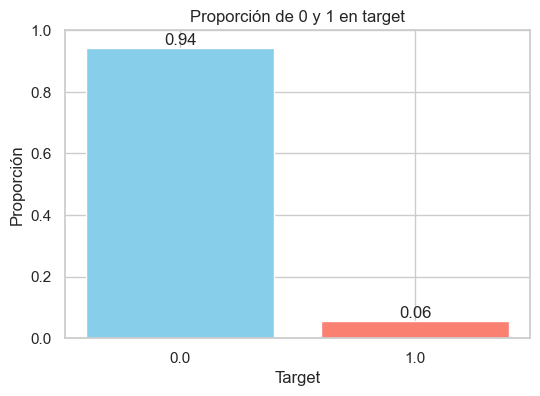

In [19]:
counts = df['target'].value_counts()
proportions = counts / counts.sum()

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(proportions.index.astype(str), proportions.values, color=['skyblue', 'salmon'])
ax.set_ylim(0, 1)
ax.set_ylabel('Proporción')
ax.set_xlabel('Target')
ax.set_title('Proporción de 0 y 1 en target')

# Añadir etiquetas encima de cada barra sin usar ciclo for
ax.bar_label(bars, fmt='%.2f')

plt.show()

In [20]:
df['zone'].nunique()

1733

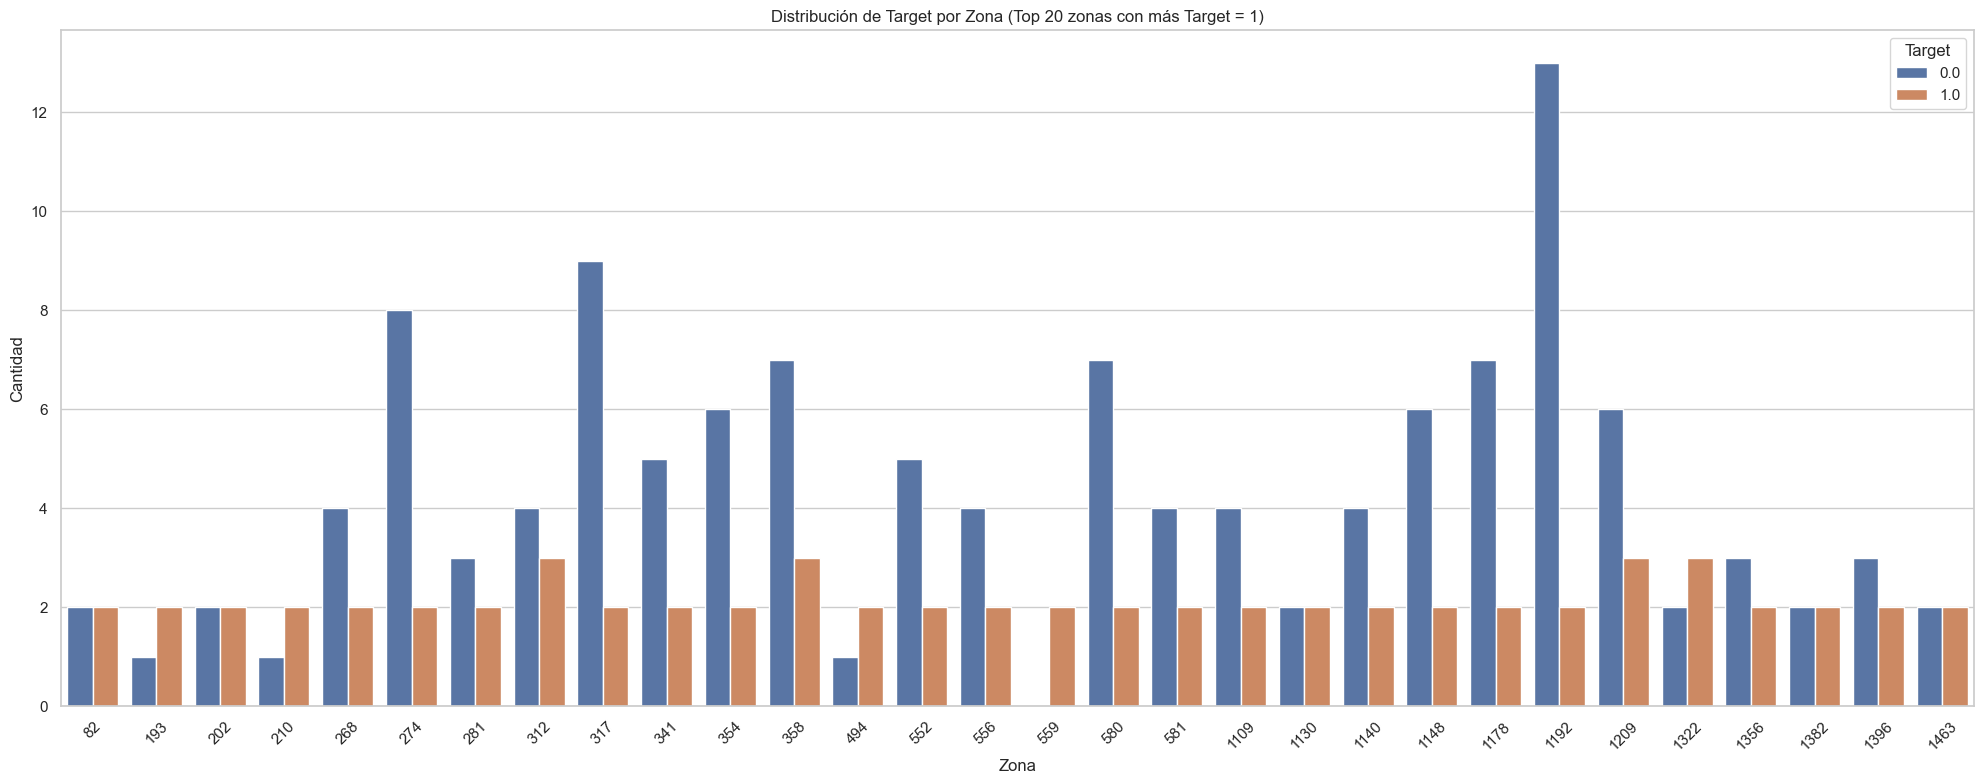

In [21]:
plt.figure(figsize=(20, 8))

# Calcular zonas con más target = 1
zonas_con_mas_target1 = df[df['target'] == 1]['zone'].value_counts().head(30).index
df_zonas_target1 = df[df['zone'].isin(zonas_con_mas_target1)]

sns.countplot(data=df_zonas_target1, x='zone', hue='target')
plt.title('Distribución de Target por Zona (Top 20 zonas con más Target = 1)')
plt.xlabel('Zona')
plt.ylabel('Cantidad')
plt.legend(title='Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CORRELACIONES FUERTES ENTRE VARIABLES DE PRODUCTOS (|r| > 0.7):
     var1   var2  correlation
2    PD_2  PD_23     0.987543
13  PD_13  PD_34     0.979951
0    PD_0  PD_21     0.979437
10  PD_10  PD_31     0.967562
20  PD_20  PD_41     0.966175
7    PD_7  PD_28     0.966035
6    PD_6  PD_27     0.948654
14  PD_14  PD_35     0.948404
18  PD_18  PD_39     0.935448
8    PD_8  PD_29     0.929623


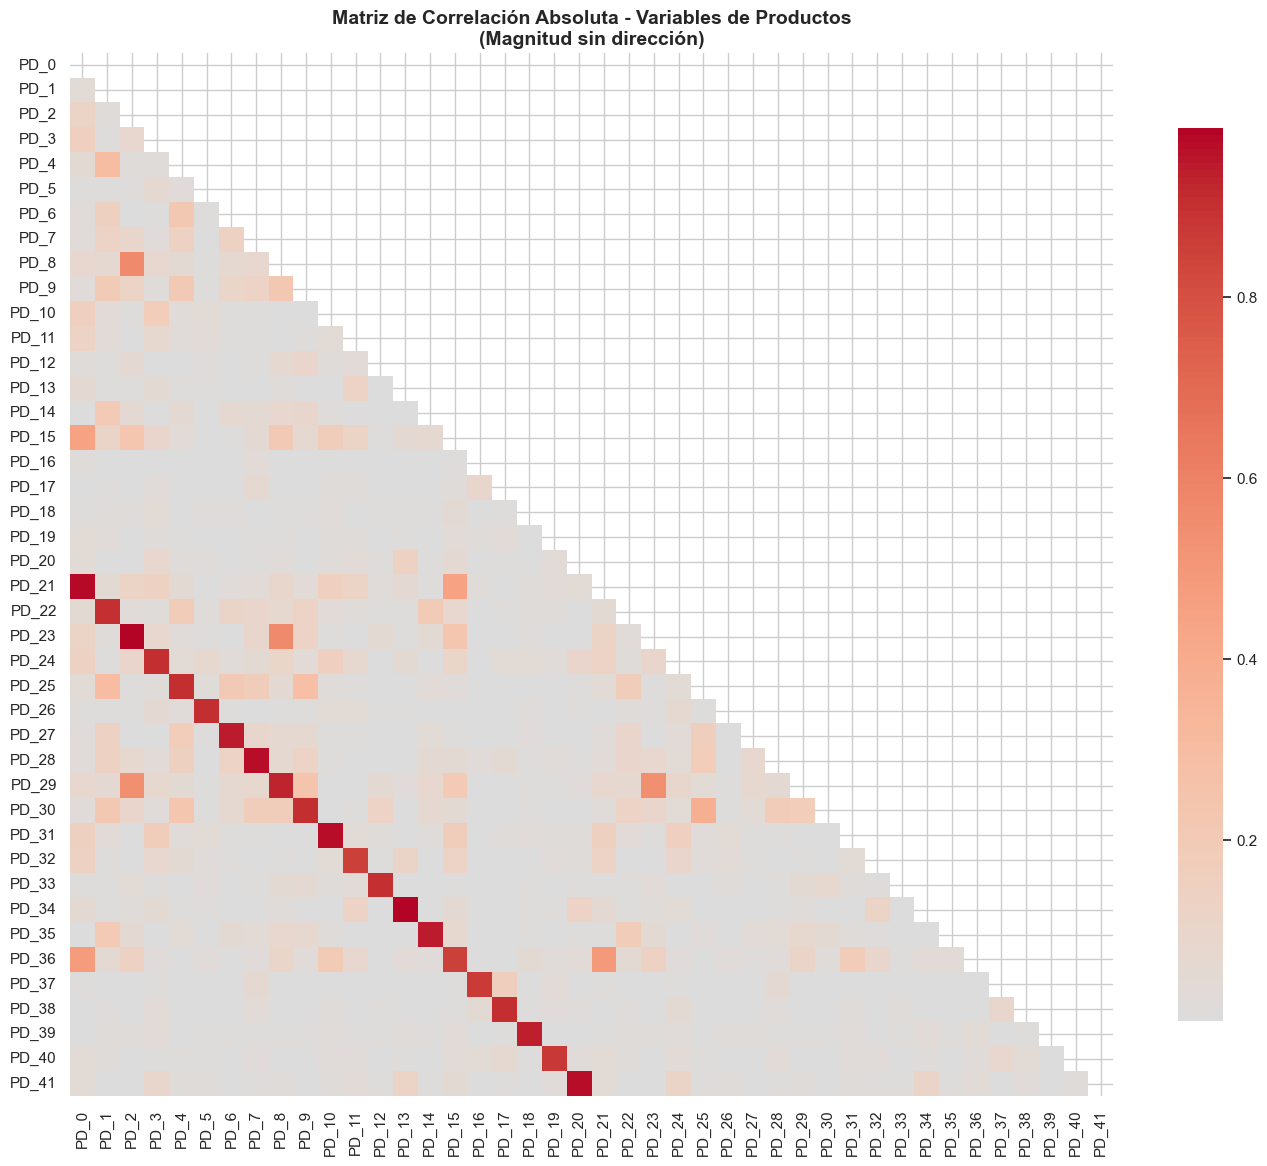

In [22]:
corr_abs_products = df[product_cols].corr().abs()

high_corr_pairs_products = []
for i in range(len(corr_abs_products.columns)):
    for j in range(i+1, len(corr_abs_products.columns)):
        if corr_abs_products.iloc[i, j] > 0.7:
            high_corr_pairs_products.append({
                'var1': corr_abs_products.columns[i],
                'var2': corr_abs_products.columns[j], 
                'correlation': corr_abs_products.iloc[i, j]
            })

high_corr_df_products = pd.DataFrame(high_corr_pairs_products).sort_values('correlation', ascending=False)

print("CORRELACIONES FUERTES ENTRE VARIABLES DE PRODUCTOS (|r| > 0.7):")
print(high_corr_df_products.head(10))

mask_products = np.triu(np.ones_like(corr_abs_products, dtype=bool))

plt.figure(figsize=(14, 12))
sns.heatmap(corr_abs_products, 
            mask=mask_products,
            cmap='coolwarm', 
            center=0,
            annot=False,
            square=True,
            cbar_kws={'shrink': 0.8})
plt.title("Matriz de Correlación Absoluta - Variables de Productos\n(Magnitud sin dirección)", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Resultados del EDA

## 1) Multicolinealidad

* Se observa una alta correlación en pares entre columnas de información de productos, de la forma:
  - PD_21 - PD_0
  - PD_22 - PD_1
  - PD_23 - PD_2
  - ...
  - PD_41 - PD_20

Esto indica una **redundancia en los datos de productos**, probablemente debido a que algunas columnas son versiones derivadas o transformadas de otras, por lo que aportan poca información para un modelo, al ser redundantes es recomendable quedarnos con uno solo de los pares.




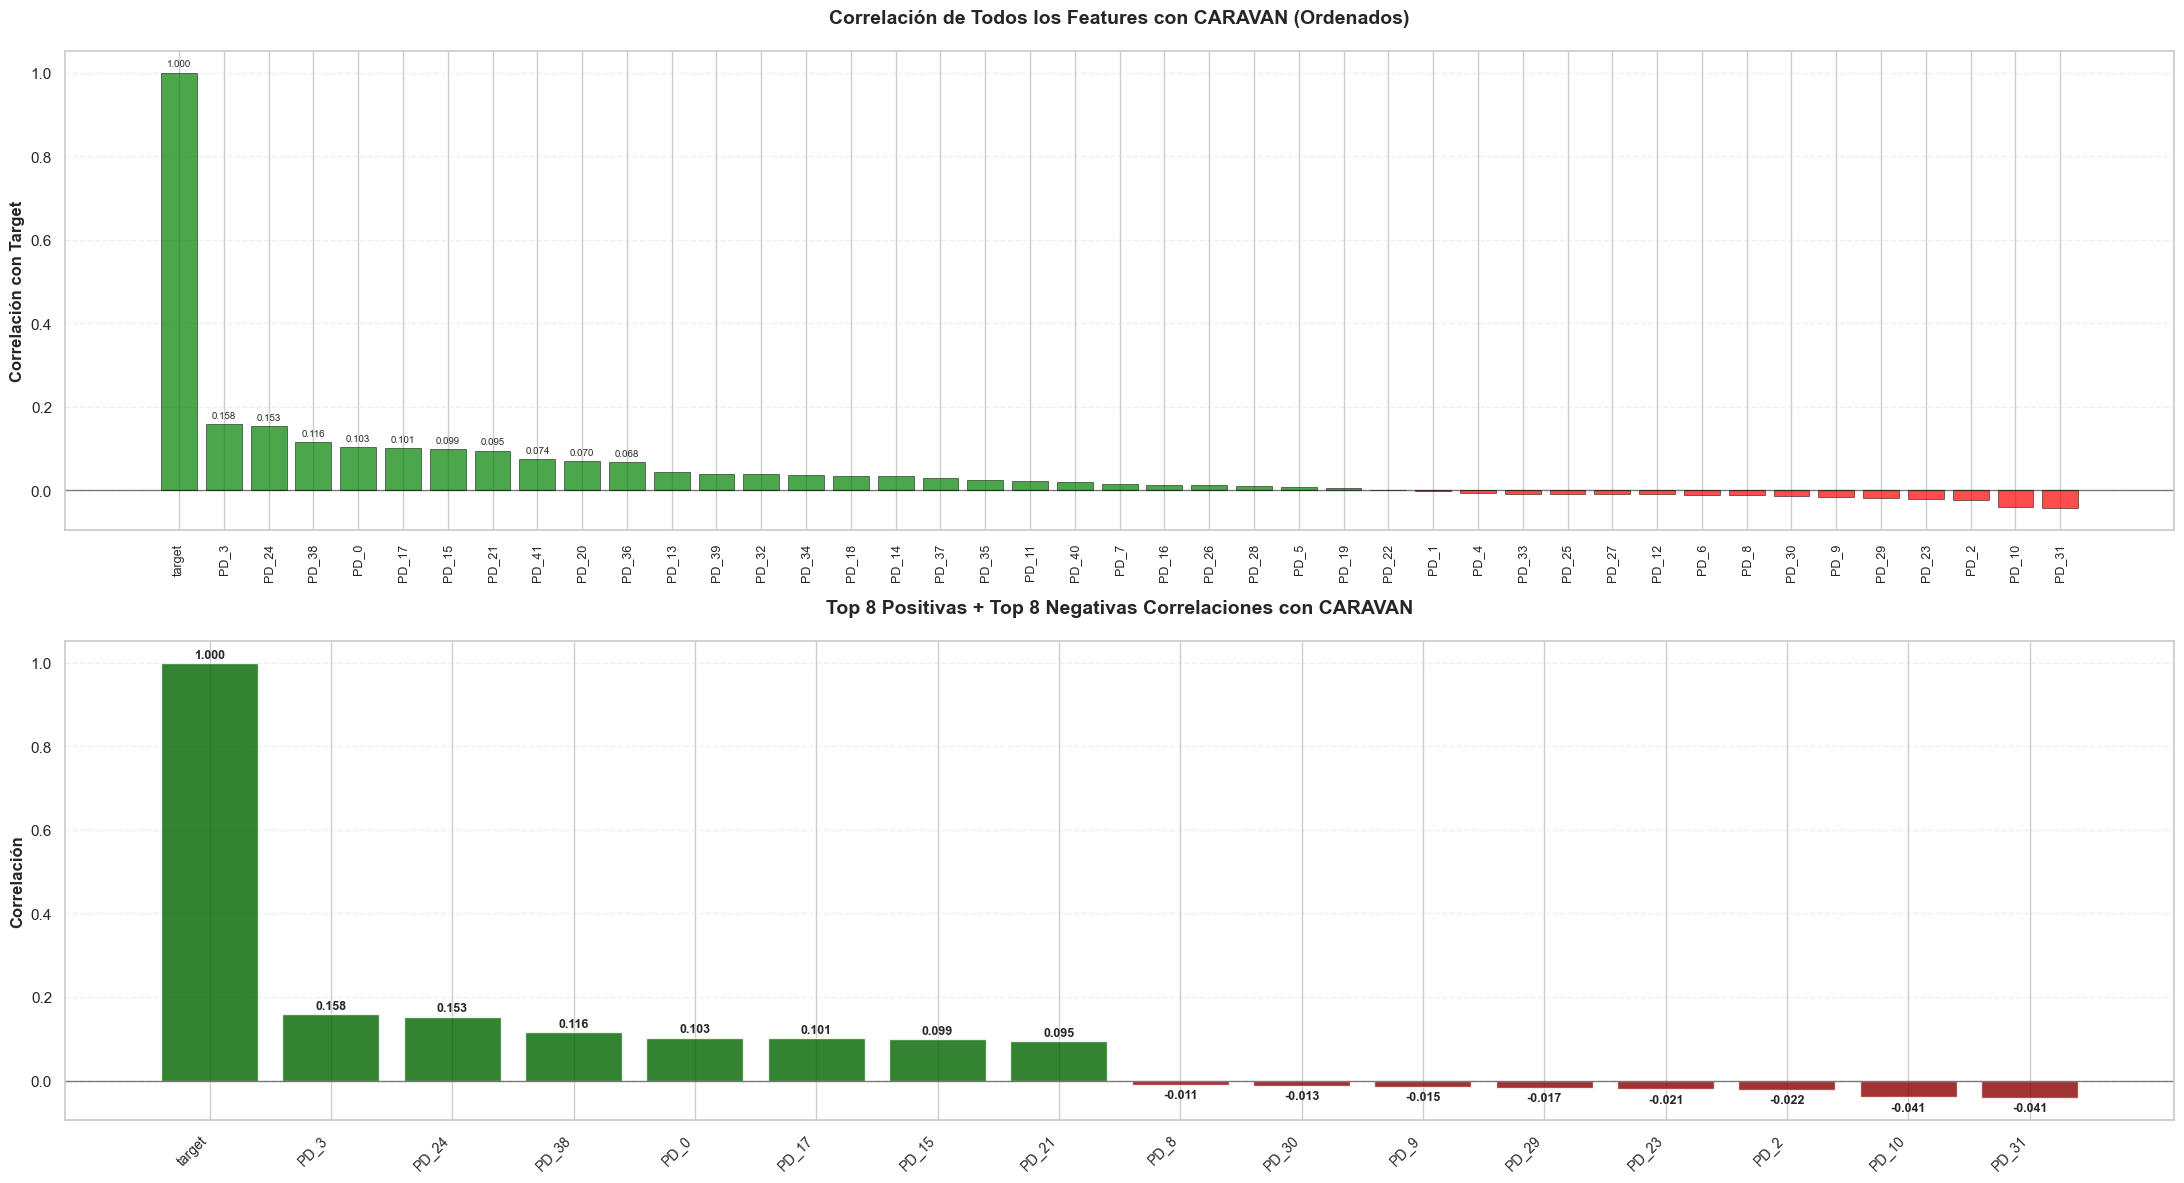

 RESUMEN DE CORRELACIONES CON TARGET:
Total features analizados: 43
Correlación máxima: 1.0000
Correlación mínima: -0.0413
Features con correlación > 0.1: 6
Features con correlación < -0.1: 0
Features con |correlación| > 0.05: 11

 TOP 5 CORRELACIONES POSITIVAS:
target    1.000000
PD_3      0.158325
PD_24     0.153171
PD_38     0.116451
PD_0      0.102838
dtype: float64

 TOP 5 CORRELACIONES NEGATIVAS:
PD_29   -0.016906
PD_23   -0.021294
PD_2    -0.021702
PD_10   -0.040548
PD_31   -0.041326
dtype: float64


In [23]:
target_col = 'target'
cor_target = {}

for col in df.columns[:-1]:
    corr, _ = pointbiserialr(df[col], df[target_col])
    cor_target[col] = corr
    
cor_target = pd.Series(cor_target).sort_values(key=abs, ascending=False)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 12))

cor_target_sorted = cor_target.sort_values(ascending=False)

bars1 = ax1.bar(cor_target_sorted.index, cor_target_sorted.values,
                color=['green' if x > 0 else 'red' for x in cor_target_sorted.values],
                alpha=0.7, edgecolor='black', linewidth=0.5)

ax1.set_xticks(range(len(cor_target_sorted)))
ax1.set_xticklabels(cor_target_sorted.index, rotation=90, fontsize=9)
ax1.set_ylabel("Correlación con Target", fontsize=12, fontweight='bold')
ax1.set_title("Correlación de Todos los Features con CARAVAN (Ordenados)", 
              fontsize=14, fontweight='bold', pad=20)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

for i, (bar, value) in enumerate(zip(bars1, cor_target_sorted.values)):
    if abs(value) > 0.05:
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.01 if value > 0 else -0.02), 
                f'{value:.3f}', ha='center', va='bottom' if value > 0 else 'top', 
                fontsize=7, rotation=0)

top_pos = cor_target_sorted.head(8)
top_neg = cor_target_sorted.tail(8)
top_combined = pd.concat([top_pos, top_neg])

colors_top = ['darkgreen' if x > 0 else 'darkred' for x in top_combined.values]
bars2 = ax2.bar(range(len(top_combined)), top_combined.values, color=colors_top, alpha=0.8)

ax2.set_xticks(range(len(top_combined)))
ax2.set_xticklabels(top_combined.index, rotation=45, fontsize=10, ha='right')
ax2.set_ylabel("Correlación", fontsize=12, fontweight='bold')
ax2.set_title("Top 8 Positivas + Top 8 Negativas Correlaciones con CARAVAN", 
              fontsize=14, fontweight='bold', pad=20)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

for i, (bar, value) in enumerate(zip(bars2, top_combined.values)):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.005 if value > 0 else -0.01), 
            f'{value:.3f}', ha='center', va='bottom' if value > 0 else 'top', 
            fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(" RESUMEN DE CORRELACIONES CON TARGET:")
print(f"Total features analizados: {len(cor_target)}")
print(f"Correlación máxima: {cor_target.max():.4f}")
print(f"Correlación mínima: {cor_target.min():.4f}")
print(f"Features con correlación > 0.1: {sum(cor_target > 0.1)}")
print(f"Features con correlación < -0.1: {sum(cor_target < -0.1)}")
print(f"Features con |correlación| > 0.05: {sum(abs(cor_target) > 0.05)}")

print("\n TOP 5 CORRELACIONES POSITIVAS:")
print(cor_target_sorted.head(5))
print("\n TOP 5 CORRELACIONES NEGATIVAS:")
print(cor_target_sorted.tail(5))

In [24]:
x2 = high_corr_df_products[high_corr_df_products['correlation']>0.95]
x2

,var1,var2,correlation
2,PD_2,PD_23,0.987543
13,PD_13,PD_34,0.979951
0,PD_0,PD_21,0.979437
10,PD_10,PD_31,0.967562
20,PD_20,PD_41,0.966175
7,PD_7,PD_28,0.966035


In [25]:
# Elimino el par que tiene menor correlación con la variable target

cols_to_evaluate = x2

cols_to_drop = []

for _, row in cols_to_evaluate.iterrows():
    var1 = row['var1']
    var2 = row['var2']
    
    # Comparar la correlación absoluta con el target
    corr_var1 = abs(cor_target[var1])
    corr_var2 = abs(cor_target[var2])
    
    # Quedarse con la columna más correlacionada, eliminar la otra
    if corr_var1 < corr_var2:
        cols_to_drop.append(var1)
    else:
        cols_to_drop.append(var2)

cols_to_drop = list(set(cols_to_drop))

df = df.drop(columns=cols_to_drop)

print("Columnas eliminadas:", cols_to_drop)
print("Shape después de eliminar redundantes:", df.shape)


product_cols = list(set(product_cols) - set(cols_to_drop))


Columnas eliminadas: ['PD_28', 'PD_23', 'PD_10', 'PD_21', 'PD_34', 'PD_20']
Shape después de eliminar redundantes: (5121, 38)


# Distribuciones


* Para el uso de productos se presentan distribuciones esparsas, con la mayoría de los datos acumulados en un solo valor, por lo que se recomienda eliminar aquellas en las que los valores diferentes al más común, no se relacionan con 'target'

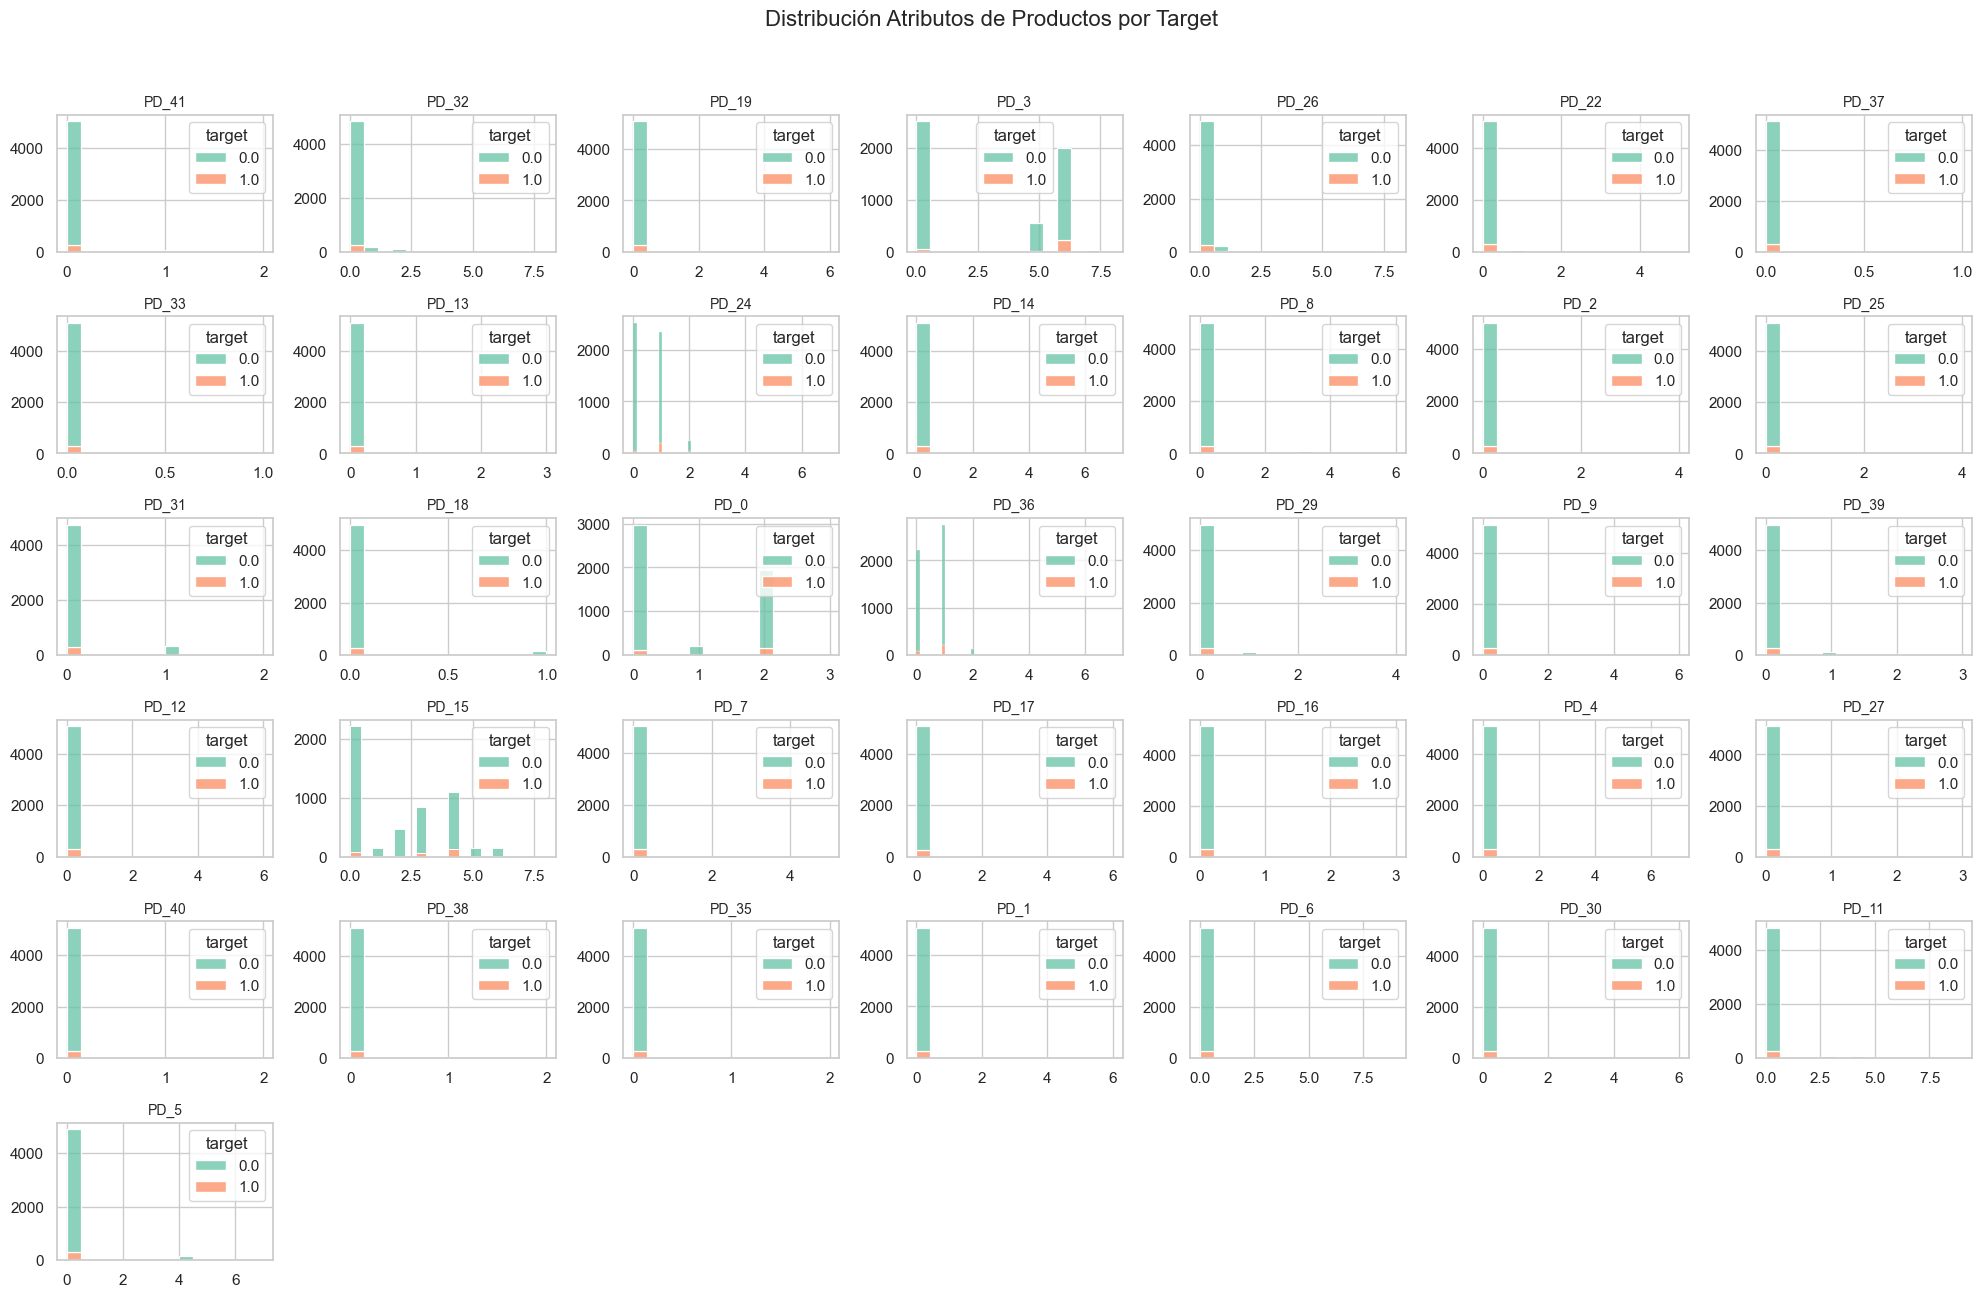

In [26]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(product_cols):
    plt.subplot(7, 7, i+1)
    sns.histplot(
        data=df, 
        x=col, 
        hue='target',       # Diferencia por clase target
        multiple='stack',   # Se pueden apilar o usar 'dodge'
        palette='Set2', 
        kde=False
    )
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.suptitle("Distribución Atributos de Productos por Target", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [27]:
# Detectar columnas sesgadas
skewness = df[product_cols].skew()
skewed_cols = skewness[abs(skewness) > 0.5].index.tolist()
print("Columnas sesgadas:", skewed_cols)

# Transformador Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')

# Aplicar transformación solo a columnas sesgadas
df = df.copy()
df[skewed_cols] = pt.fit_transform(df[skewed_cols])


Columnas sesgadas: ['PD_41', 'PD_32', 'PD_19', 'PD_26', 'PD_22', 'PD_37', 'PD_33', 'PD_13', 'PD_24', 'PD_14', 'PD_8', 'PD_2', 'PD_25', 'PD_31', 'PD_18', 'PD_36', 'PD_29', 'PD_9', 'PD_39', 'PD_12', 'PD_7', 'PD_17', 'PD_16', 'PD_4', 'PD_27', 'PD_40', 'PD_38', 'PD_35', 'PD_1', 'PD_6', 'PD_30', 'PD_11', 'PD_5']


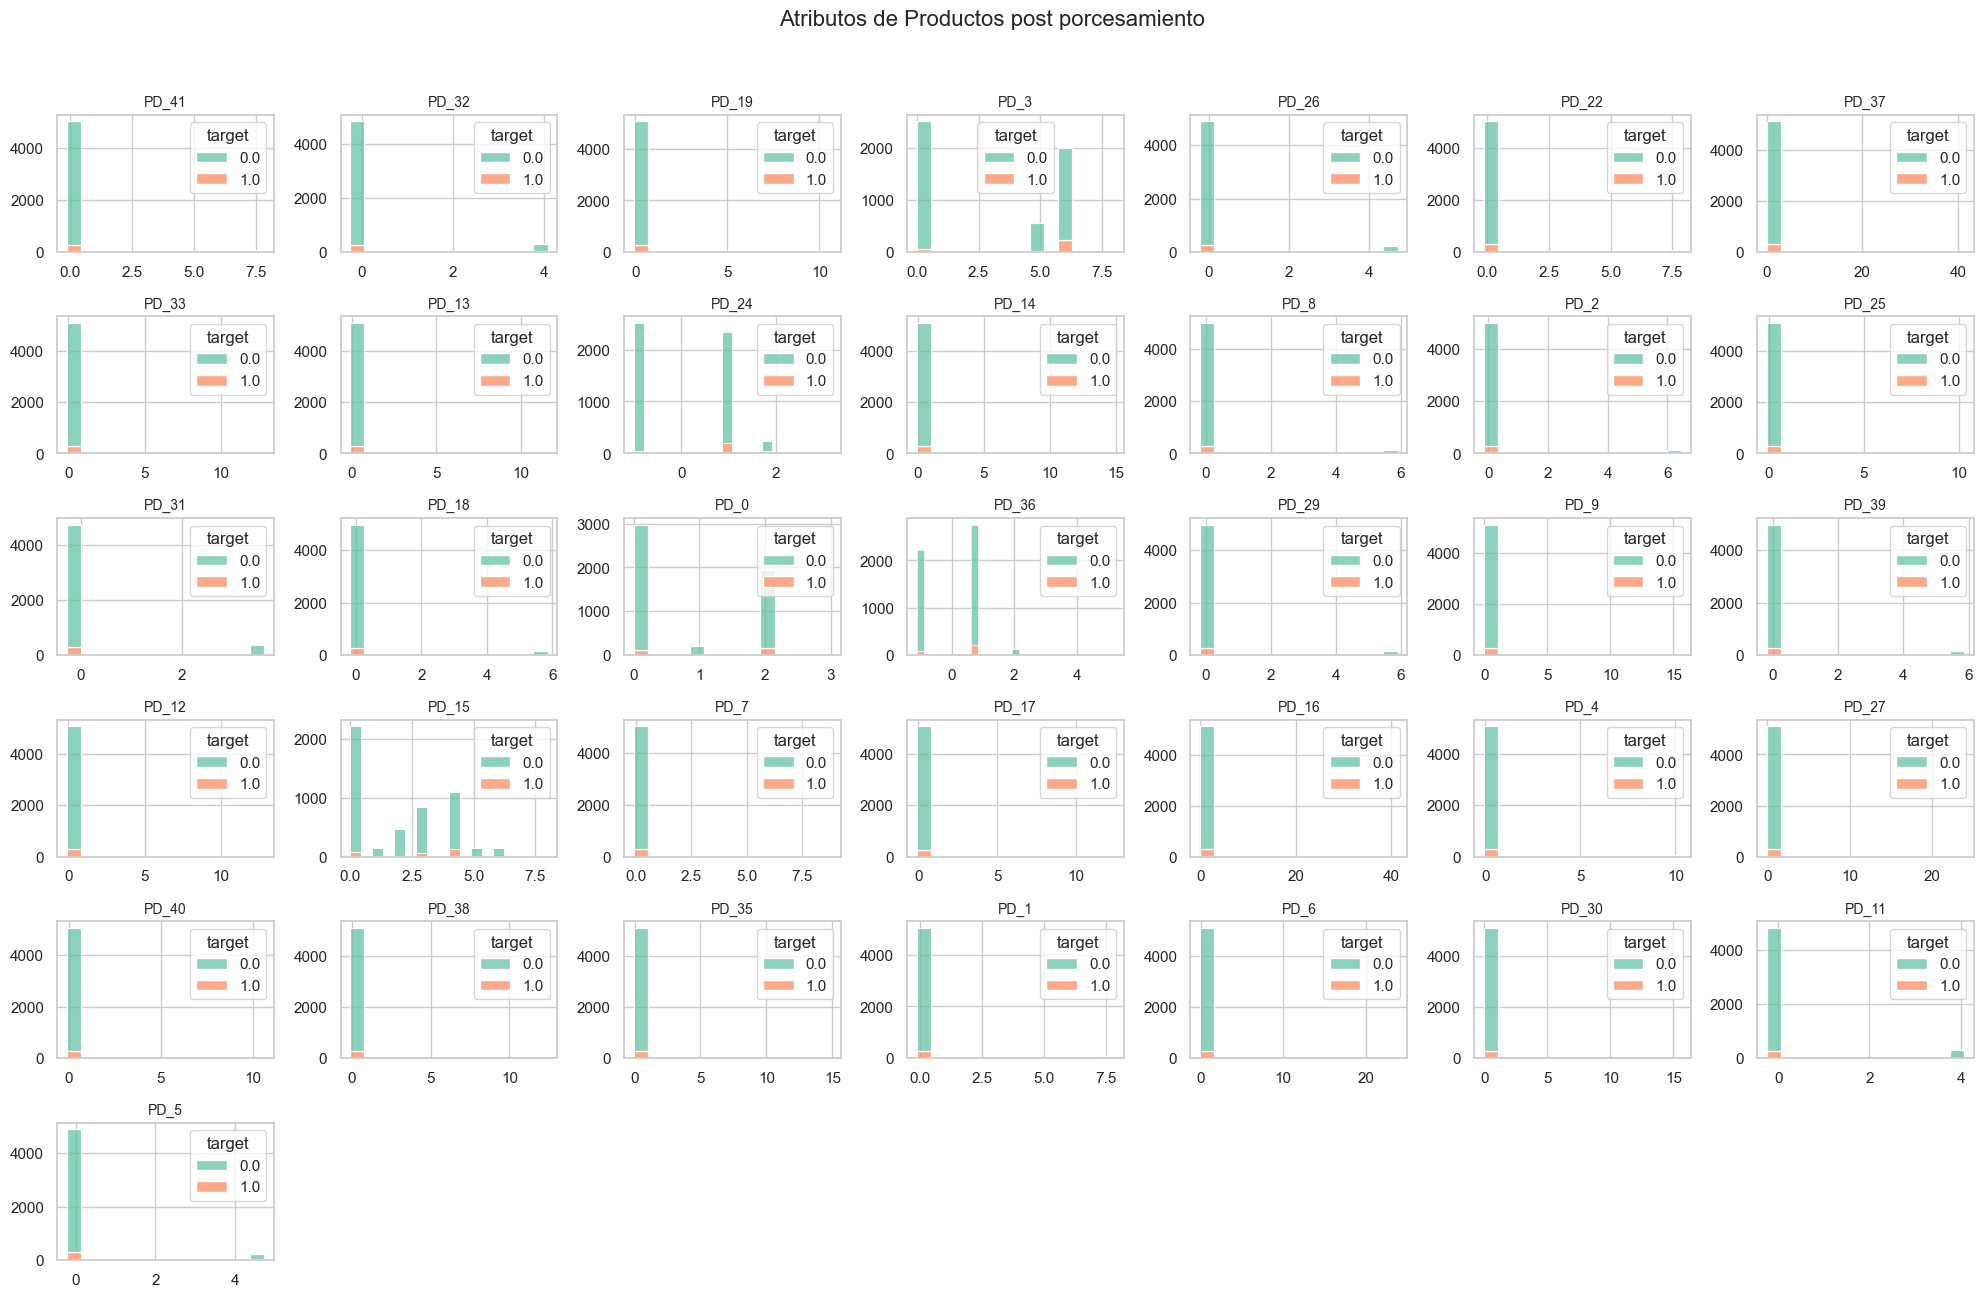

In [28]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(product_cols):
    plt.subplot(7, 7, i+1)
    sns.histplot(
        data=df, 
        x=col, 
        hue='target',       # Diferencia por clase target
        multiple='stack',   # Se pueden apilar o usar 'dodge'
        palette='Set2', 
        kde=False
    )
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.suptitle("Atributos de Productos post porcesamiento", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Escalamiento

Dado que probaremos con clasificadores basados en árboles:
* No dependen de la magnitud absoluta de los valores.
* Deciden los splits según umbral de la variable, no según distancia o norma.

Por lo tanto, técnicas como StandardScaler o MinMaxScaler no afectan el desempeño.

## Analsis por zona



/var/folders/yd/tfd55g4x63d6mkkqlcscwgvr0000gn/T/ipykernel_84115/2871518788.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/yd/tfd55g4x63d6mkkqlcscwgvr0000gn/T/ipykernel_84115/2871518788.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/yd/tfd55g4x63d6mkkqlcscwgvr0000gn/T/ipykernel_84115/2871518788.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/yd/tfd55g4x63d6mkkqlcscwgvr0000gn/T/ipykernel_84115/2871518788.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

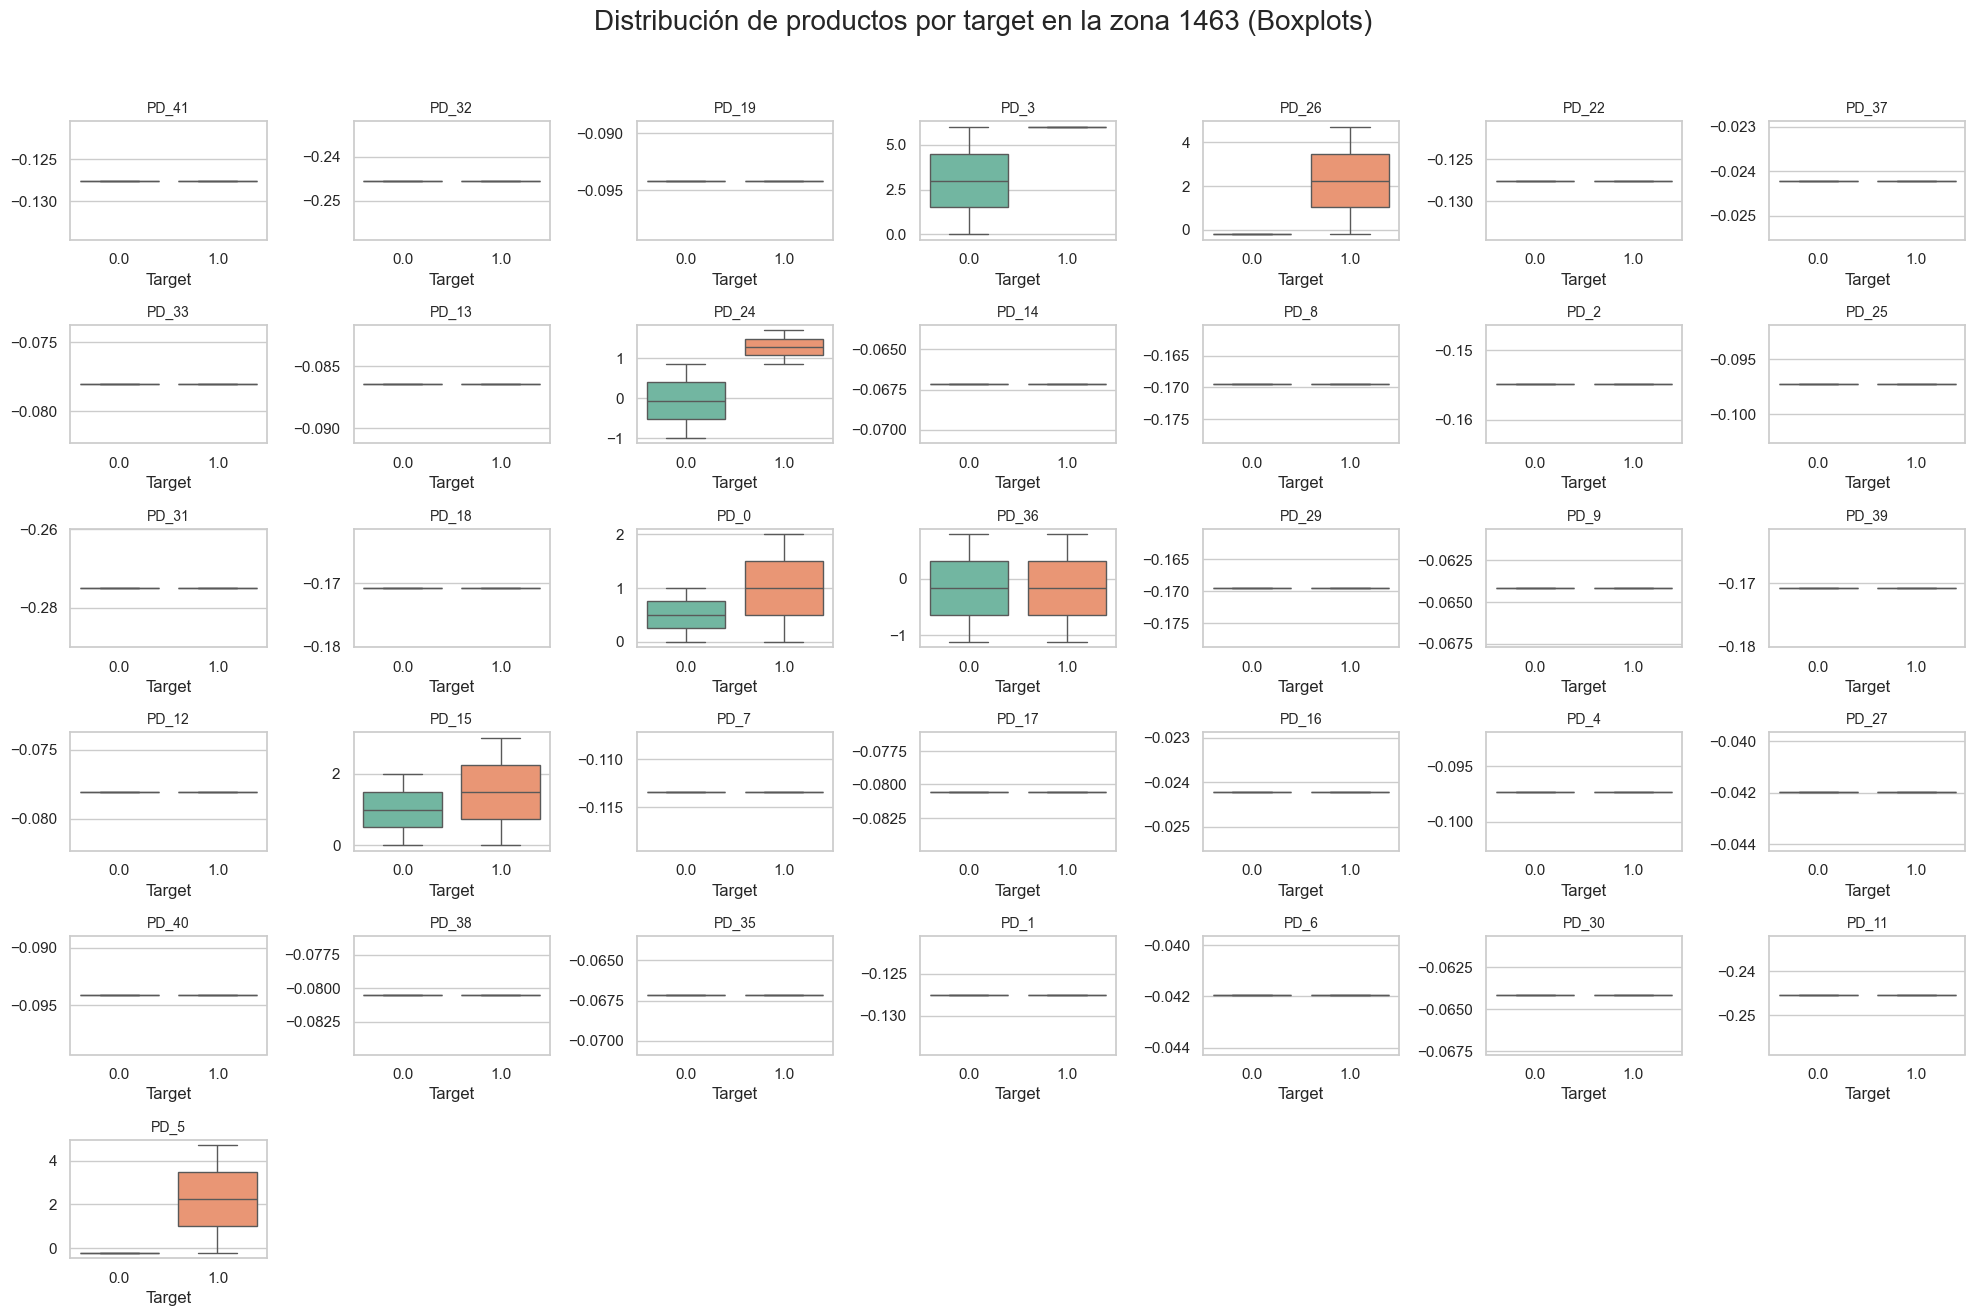

In [29]:
zona = 1463

prueba = df[df['zone']==zona]

plt.figure(figsize=(20, 15))

for i, col in enumerate(product_cols):
    plt.subplot(7, 7, i+1)
    sns.boxplot(
        data=prueba, 
        x='target', 
        y=col, 
        palette='Set2'
    )
    plt.title(col, fontsize=10)
    plt.xlabel('Target')
    plt.ylabel('')

plt.suptitle(f"Distribución de productos por target en la zona {zona} (Boxplots)", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/var/folders/yd/tfd55g4x63d6mkkqlcscwgvr0000gn/T/ipykernel_84115/1276860263.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/yd/tfd55g4x63d6mkkqlcscwgvr0000gn/T/ipykernel_84115/1276860263.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/yd/tfd55g4x63d6mkkqlcscwgvr0000gn/T/ipykernel_84115/1276860263.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/yd/tfd55g4x63d6mkkqlcscwgvr0000gn/T/ipykernel_84115/1276860263.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

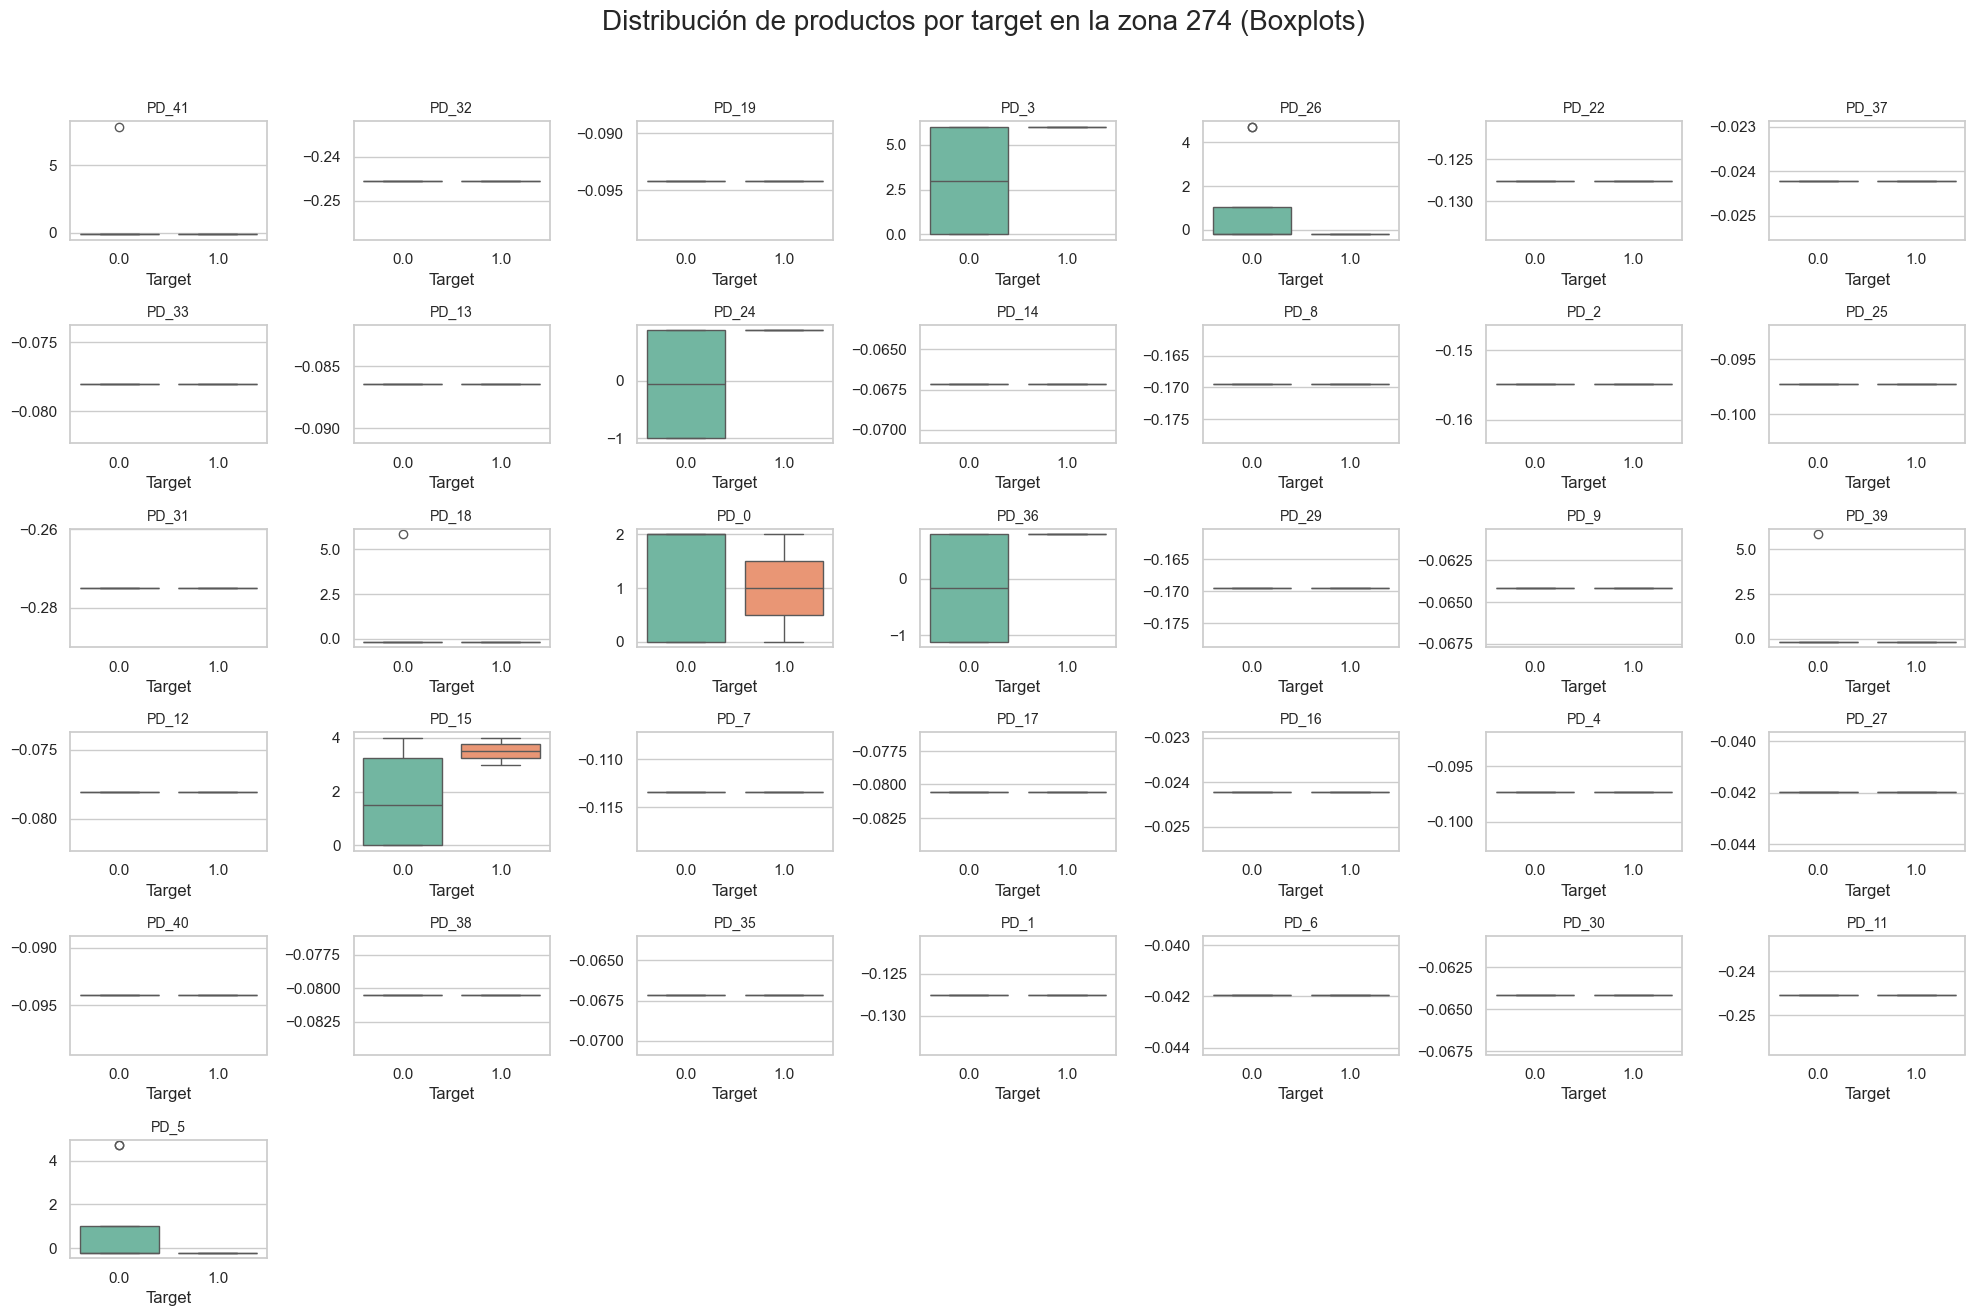

In [30]:
zona = 274

prueba = df[df['zone']==zona]

plt.figure(figsize=(20, 15))

for i, col in enumerate(product_cols):
    plt.subplot(7, 7, i+1)
    sns.boxplot(
        data=prueba, 
        x='target', 
        y=col, 
        palette='Set2'
    )
    plt.title(col, fontsize=10)
    plt.xlabel('Target')
    plt.ylabel('')

plt.suptitle(f"Distribución de productos por target en la zona {zona} (Boxplots)", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

prueba

,PD_0,PD_1,PD_2,PD_3,PD_4,PD_5,PD_6,PD_7,PD_8,PD_9,PD_11,PD_12,PD_13,PD_14,PD_15,PD_16,PD_17,PD_18,PD_19,PD_22,PD_24,PD_25,PD_26,PD_27,PD_29,PD_30,PD_31,PD_32,PD_33,PD_35,PD_36,PD_37,PD_38,PD_39,PD_40,PD_41,target,zone
799,0.0,-0.127566,-0.154904,0.0,-0.097272,-0.211870,-0.041959,-0.113384,-0.169489,-0.064169,-0.245456,-0.078041,-0.086463,-0.067168,0.0,-0.024211,-0.080535,5.858092,-0.094155,-0.127566,-0.999684,-0.097272,-0.211870,-0.041959,-0.169489,-0.064169,-0.274981,-0.245456,-0.078041,-0.067168,-1.11152,-0.024211,-0.080535,5.858092,-0.094155,-0.127566,0.0,274
1080,2.0,-0.127566,-0.154904,6.0,-0.097272,-0.211870,-0.041959,-0.113384,-0.169489,-0.064169,-0.245456,-0.078041,-0.086463,-0.067168,4.0,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,0.873617,-0.097272,-0.211870,-0.041959,-0.169489,-0.064169,-0.274981,-0.245456,-0.078041,-0.067168,0.79038,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,1.0,274
1442,0.0,-0.127566,-0.154904,6.0,-0.097272,-0.211870,-0.041959,-0.113384,-0.169489,-0.064169,-0.245456,-0.078041,-0.086463,-0.067168,0.0,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,0.873617,-0.097272,-0.211870,-0.041959,-0.169489,-0.064169,-0.274981,-0.245456,-0.078041,-0.067168,-1.11152,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,0.0,274
1453,2.0,-0.127566,-0.154904,0.0,-0.097272,-0.211870,-0.041959,-0.113384,-0.169489,-0.064169,-0.245456,-0.078041,-0.086463,-0.067168,4.0,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,-0.999684,-0.097272,-0.211870,-0.041959,-0.169489,-0.064169,-0.274981,-0.245456,-0.078041,-0.067168,0.79038,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,0.0,274
1587,2.0,-0.127566,-0.154904,6.0,-0.097272,-0.211870,-0.041959,-0.113384,-0.169489,-0.064169,-0.245456,-0.078041,-0.086463,-0.067168,3.0,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,0.873617,-0.097272,-0.211870,-0.041959,-0.169489,-0.064169,-0.274981,-0.245456,-0.078041,-0.067168,0.79038,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,0.0,274
2542,2.0,-0.127566,-0.154904,0.0,-0.097272,4.719881,-0.041959,-0.113384,-0.169489,-0.064169,-0.245456,-0.078041,-0.086463,-0.067168,3.0,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,-0.999684,-0.097272,4.719881,-0.041959,-0.169489,-0.064169,-0.274981,-0.245456,-0.078041,-0.067168,0.79038,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,0.0,274
3630,0.0,-0.127566,-0.154904,6.0,-0.097272,4.719881,-0.041959,-0.113384,-0.169489,-0.064169,-0.245456,-0.078041,-0.086463,-0.067168,0.0,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,0.873617,-0.097272,4.719881,-0.041959,-0.169489,-0.064169,-0.274981,-0.245456,-0.078041,-0.067168,-1.11152,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,0.0,274
4071,0.0,-0.127566,-0.154904,6.0,-0.097272,-0.211870,-0.041959,-0.113384,-0.169489,-0.064169,-0.245456,-0.078041,-0.086463,-0.067168,3.0,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,0.873617,-0.097272,-0.211870,-0.041959,-0.169489,-0.064169,-0.274981,-0.245456,-0.078041,-0.067168,0.79038,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,1.0,274
4327,2.0,-0.127566,-0.154904,0.0,-0.097272,-0.211870,-0.041959,-0.113384,-0.169489,-0.064169,-0.245456,-0.078041,-0.086463,-0.067168,0.0,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,-0.999684,-0.097272,-0.211870,-0.041959,-0.169489,-0.064169,-0.274981,-0.245456,-0.078041,-0.067168,-1.11152,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,0.0,274
4711,2.0,-0.127566,-0.154904,6.0,-0.097272,-0.211870,-0.041959,-0.113384,-0.169489,-0.064169,-0.245456,-0.078041,-0.086463,-0.067168,4.0,-0.024211,-0.080535,-0.170704,-0.094155,-0.127566,0.873617,-0.097272,-0.211870,-0.041959,-0.169489,-0.064169,-0.274981,-0.245456,-0.078041,-0.067168,0.79038,-0.024211,-0.080535,-0.170704,-0.094155,7.839083,0.0,274


In [32]:
df['zone'] = df['zone'].astype(int)

zone_dummies = pd.get_dummies(df['zone'], prefix='zone')
df_final = pd.concat([df.drop('zone', axis=1), zone_dummies], axis=1)

df_final.to_csv('../data/processed/insurance_company_processed_data.csv', index=False)
os.chdir("..")


In [33]:
!dvc add data/processed/insurance_company_processed_data.csv


⠋ Checking graph
Adding...                                                                       
!
                                                                                
!
  0% Checking cache in '/Users/luisfernandocaporalmontesdeoca/Documents/MNA-V Te
                                                                                
!
  0%|          |Adding data/processed/insurance_compan0/1 [00:00<?,     ?file/s]
                                                                                
!
  0%|          |Checking out /Users/luisfernandocapora0/1 [00:00<?,    ?files/s]
100% Adding...|████████████████████████████████████████|1/1 [00:00, 21.51file/s]

To track the changes with git, run:

	git add data/processed/insurance_company_processed_data.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true
